In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [2]:
data= pd.read_csv("Thurber_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,80.574,-3.067
NaN,84.248,-2.981
NaN,87.264,-2.921
NaN,87.195,-2.912
NaN,89.076,-2.840
NaN,89.608,-2.797
NaN,89.868,-2.702
NaN,90.101,-2.699
NaN,92.405,-2.633
NaN,95.854,-2.481


In [3]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

# b = torch.tensor([1000,1000,400,40,0.7,0.3,0.03],requires_grad=True)
b = torch.tensor([1300,1500,500,75,1,0.4,0.05],requires_grad=True)

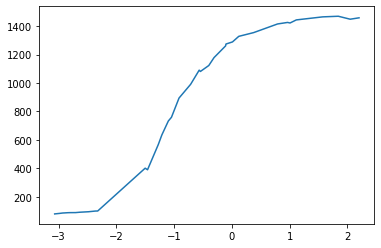

In [4]:
plt.plot(x.numpy(),y.numpy())

In [5]:
## Numerical Differentiation

# b = np.array([1000,1000,400,40,0.7,0.3,0.03]).reshape(-1,1)
b = np.array([1300,1500,500,75,1,0.4,0.05]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0

   

def f0(b0):
    return (b0 + b[1]*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f1(b1):
    return(b[0] + b1*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f2(b2):
    return (b[0] + b[1]*x + b2*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f3(b3):
    return (b[0] + b[1]*x + b[2]*np.square(x) + b3*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f4(b4):
    return (b[0] + b[1]*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b4*x + b[5]*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f5(b5):
    return (b[0] + b[1]*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b5*np.square(x) + b[6]*np.power(x,3))-y.detach().numpy()  
def f6(b6):
    return (b[0] + b[1]*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b6*np.power(x,3))-y.detach().numpy()  


start_time = time.time()
for c in range(500):
    
    y_pred = (b[0] + b[1]*x + b[2]*np.square(x) + b[3]*np.power(x,3)) / (1 + b[4]*x + b[5]*np.square(x) + b[6]*np.power(x,3))  
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    d_b2 = derivative(f2,b[2] , dx=1e-6)
    d_b3 = derivative(f3,b[3] , dx=1e-6)
    d_b4 = derivative(f4,b[4] , dx=1e-6)
    d_b5 = derivative(f5,b[5] , dx=1e-6)
    d_b6 = derivative(f6,b[6] , dx=1e-6)
     
    jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4,d_b5,d_b6]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V < 5.6427082397E+03:
        break
print("time taken to execute: ",time.time()-start_time)  

c:  0  error:  85873749.82313623  B: [[1.28876115e+03]
 [1.48774765e+03]
 [5.64667557e+02]
 [7.26321563e+01]
 [9.64730544e-01]
 [3.83839365e-01]
 [4.75818827e-02]]
c:  1  error:  809864.7781325612  B: [[1.28873351e+03]
 [1.48053008e+03]
 [5.73153864e+02]
 [7.38695466e+01]
 [9.57666228e-01]
 [3.91839558e-01]
 [4.88232240e-02]]
c:  2  error:  29138.167807215676  B: [[1.28828556e+03]
 [1.48372881e+03]
 [5.77964762e+02]
 [7.44602219e+01]
 [9.60421346e-01]
 [3.95372769e-01]
 [4.88327849e-02]]
c:  3  error:  5729.369919273743  B: [[1.28815047e+03]
 [1.49273988e+03]
 [5.84340084e+02]
 [7.56311000e+01]
 [9.67216583e-01]
 [3.98388309e-01]
 [5.01698589e-02]]
c:  4  error:  5645.0781185217365  B: [[1.28815104e+03]
 [1.48962170e+03]
 [5.82218436e+02]
 [7.52173149e+01]
 [9.65299874e-01]
 [3.97521813e-01]
 [4.94404511e-02]]
c:  5  error:  5643.34191181903  B: [[1.28813380e+03]
 [1.49208993e+03]
 [5.83944636e+02]
 [7.55547174e+01]
 [9.66978592e-01]
 [3.98284784e-01]
 [4.99289617e-02]]
c:  6  error:  

In [6]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [7]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.time()
for c in range(200):
    
    y_pred = (b[0] + b[1]*x + b[2]*torch.square(x) + b[3]*torch.pow(x,3)) / (1 + b[4]*x + b[5]*torch.square(x) + b[6]*torch.pow(x,3))
    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error< 5.642708245E+03: #3.9050739624 given residual sum of squares
        break
print("time taken to execute: ",time.time()-start_time)     

TypeError: square(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
plt.plot(y_pred.detach(),'g.', y,'r')